In [1]:
# Libraries for data manipulation
import pandas as pd
import numpy as np

# Libraries for visualization
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for feature and target encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer

# Libraries for Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import GenericUnivariateSelect, chi2
from sklearn.feature_selection import VarianceThreshold

# Libraries for Model Selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Libraries of Shuffling
from sklearn.utils import shuffle

# Libraries for metrics in Machine Learning
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score

# Libraries for Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

# Data Conversion Libraries
from tensorflow.keras.utils import to_categorical

# Libraries for Layer activation functions
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.layers import Flatten, Dense

# Libraries for optimazation
from tensorflow.keras.optimizers import Adam

#Libraries for metrics in Deep Learning
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Accuracy

# Libraries for Random
import random

# Libraries for reproducibility
import session_info


np.random.seed(42)

In [2]:
full_data = pd.read_csv("full_data.txt", sep=',')
full_data

,Unnamed: 0,Hugo_Symbol,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,t_ref_count,t_alt_count,Transcript_ID,Disease_Type
0,0,PAX5,GRCh37,9,37015005,37015005,+,missense_variant,Missense_Mutation,SNP,A,A,C,SJINF023,97.0,17.0,ENST00000358127,ALL
1,1,NRAS,GRCh37,1,115258744,115258744,+,missense_variant,Missense_Mutation,SNP,C,C,T,SJINF024,470.0,48.0,ENST00000369535,ALL
2,2,PIK3CA,GRCh37,3,178952085,178952085,+,missense_variant,Missense_Mutation,SNP,A,A,G,SJINF024,1010.0,217.0,ENST00000263967,ALL
3,3,NEB,GRCh37,2,152487806,152487806,+,missense_variant,Missense_Mutation,SNP,C,C,T,SJINF028,270.0,136.0,ENST00000397345,ALL
4,4,KRAS,GRCh37,12,25398284,25398284,+,missense_variant,Missense_Mutation,SNP,C,C,A,SJINF029,463.0,205.0,ENST00000256078,ALL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9610,9610,RSU1P1,GRCh37,10,43221241,43221241,+,upstream_gene_variant,5'Flank,SNP,C,C,T,mnm_washu_2016_1027-1,62.0,43.0,ENST00000453416,AML_MDS
9611,9611,CD47,GRCh37,3,107762156,107762156,+,downstream_gene_variant,3'Flank,SNP,T,T,A,mnm_washu_2016_1036-1,166.0,55.0,ENST00000361309,AML_MDS
9612,9612,RNU6-458P,GRCh37,14,19123723,19123723,+,downstream_gene_variant,3'Flank,SNP,A,A,G,mnm_washu_2016_1045-1,206.0,55.0,ENST00000384179,AML_MDS
9613,9613,RNA5SP206,GRCh37,6,32046833,32046833,+,upstream_gene_variant,5'Flank,SNP,G,G,A,mnm_washu_2016_1058-1,26.0,16.0,ENST00000516703,AML_MDS


In [3]:
full_data_dropped_col = full_data.drop(["Unnamed: 0", 'NCBI_Build', 'End_Position', 'Strand', 'Variant_Classification', 'Variant_Type', 'Reference_Allele',
                           'Tumor_Sample_Barcode', 't_ref_count', 't_alt_count', 'Transcript_ID'], axis=1)

In [4]:
full_data_dropped_col

,Hugo_Symbol,Chromosome,Start_Position,Consequence,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Disease_Type
0,PAX5,9,37015005,missense_variant,A,C,ALL
1,NRAS,1,115258744,missense_variant,C,T,ALL
2,PIK3CA,3,178952085,missense_variant,A,G,ALL
3,NEB,2,152487806,missense_variant,C,T,ALL
4,KRAS,12,25398284,missense_variant,C,A,ALL
...,...,...,...,...,...,...,...
9610,RSU1P1,10,43221241,upstream_gene_variant,C,T,AML_MDS
9611,CD47,3,107762156,downstream_gene_variant,T,A,AML_MDS
9612,RNU6-458P,14,19123723,downstream_gene_variant,A,G,AML_MDS
9613,RNA5SP206,6,32046833,upstream_gene_variant,G,A,AML_MDS


In [5]:
dl_features = full_data_dropped_col.columns[:-1]  # Exclude the last column
full_data_dropped_col[dl_features] = full_data_dropped_col[dl_features].astype(str)
get_dummies_dl = pd.get_dummies(full_data_dropped_col, drop_first=True, columns=dl_features, dtype=int)
get_dummies_dl.head

<bound method NDFrame.head of      Disease_Type  Hugo_Symbol_AAA1  Hugo_Symbol_AACS  Hugo_Symbol_AADAC  \
0             ALL                 0                 0                  0   
1             ALL                 0                 0                  0   
2             ALL                 0                 0                  0   
3             ALL                 0                 0                  0   
4             ALL                 0                 0                  0   
...           ...               ...               ...                ...   
9610      AML_MDS                 0                 0                  0   
9611      AML_MDS                 0                 0                  0   
9612      AML_MDS                 0                 0                  0   
9613      AML_MDS                 0                 0                  0   
9614      AML_MDS                 0                 0                  0   

      Hugo_Symbol_AADACL3  Hugo_Symbol_AAMP  Hugo_Symbol_

In [6]:
### Moving column Disease Type from 13 to first and first to last ###

col = get_dummies_dl.pop("Disease_Type")
test_full_data = get_dummies_dl.insert(0, col.name, col)

temp_cols=get_dummies_dl.columns.tolist()
new_cols=temp_cols[1:] + temp_cols[0:1]
get_dummies_dl=get_dummies_dl[new_cols]
dl_features = get_dummies_dl.iloc[:, :-1]

target = get_dummies_dl["Disease_Type"]
label_encoder = LabelEncoder()
label_encoder.fit(target)
dl_target = label_encoder.fit_transform(target)
diseases = label_encoder.classes_

In [7]:
# Shuffle the data
dl_features_shuffled_2nd, dl_target_shuffled_2nd = shuffle(dl_features, dl_target, random_state=42)

In [8]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(dl_features, dl_target):
    X_train_2nd, X_test_2nd = dl_features_shuffled_2nd.iloc[train_index], dl_features_shuffled_2nd.iloc[test_index]
    y_train_2nd, y_test_2nd = dl_target_shuffled_2nd[train_index], dl_target_shuffled_2nd[test_index]

In [9]:
# Remove constant features again in case any were missed
X_train_2nd = X_train_2nd.loc[:, ~X_train_2nd.columns.duplicated()]
X_test_2nd = X_test_2nd.loc[:, ~X_test_2nd.columns.duplicated()]
print('Shape after drop-->',X_test_2nd.shape, X_test_2nd.shape)

Shape after drop--> (1923, 15461) (1923, 15461)


In [10]:
def prepare_inputs(X_train_2nd, X_test_2nd):
    # Set unknown_value to an integer or np.nan
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)  # Example: -1 as unknown value
    oe.fit(X_train_2nd)
    X_train_encode = oe.transform(X_train_2nd)
    X_test_encode = oe.transform(X_test_2nd)
    return X_train_encode, X_test_encode

X_train_encode, X_test_encode = prepare_inputs(X_train_2nd, X_test_2nd)

In [11]:
def prepare_targets(y_train_2nd, y_test_2nd):
    le = LabelEncoder()
    le.fit(y_train_2nd)
    y_train_encode = le.transform(y_train_2nd)
    y_test_encode = le.transform(y_test_2nd)
    return y_train_encode, y_test_encode

In [12]:
def select_features(X_train_2nd, y_train_2nd, X_test_2nd):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train_2nd, y_train_2nd)
    X_train_fs = fs.transform(X_train_2nd)
    X_test_fs = fs.transform(X_test_2nd)
    return X_train_fs, X_test_fs, fs

In [13]:
X_train_encode, X_test_encode = prepare_inputs(X_train_2nd, X_test_2nd)
y_train_encode, y_test_encode = prepare_targets(y_train_2nd, y_test_2nd)
X_train_fs, X_test_fs, fs = select_features(X_train_encode, y_train_encode, X_test_encode)

In [14]:
# for i in range(len(fs.scores_)):
#     print('Feature %d: %f' % (i, fs.scores_[i]))

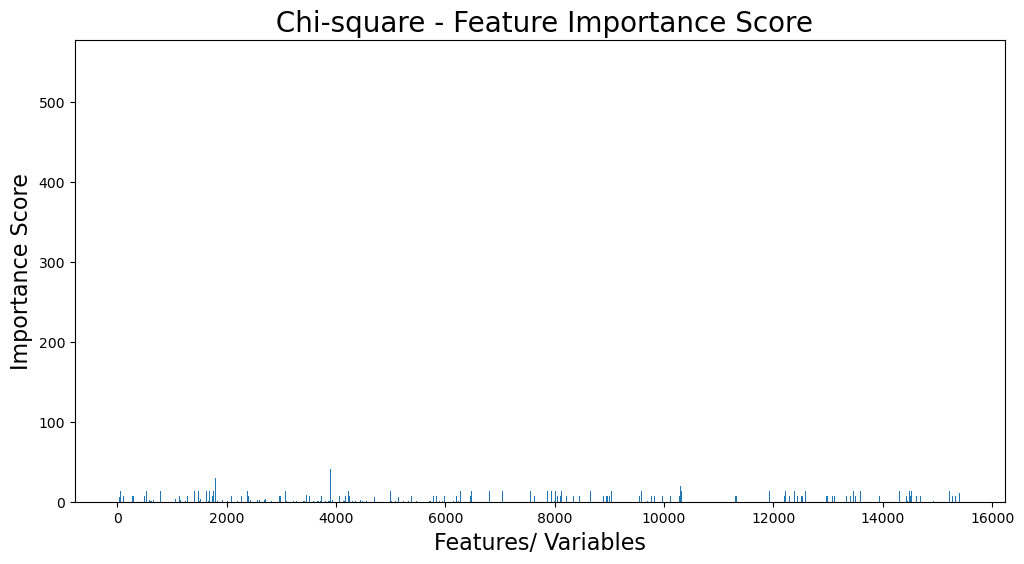

In [15]:
plt.figure(figsize = (12,6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title(" Chi-square - Feature Importance Score", size = 20)
plt.xlabel("Features/ Variables", size = 16, color = "black")
plt.ylabel("Importance Score", size = 16, color = "black")
plt.show()

In [16]:
extract_features = np.isnan(fs.scores_)
selected_features_indices = np.where(~extract_features)[0]
X_new_2nd = dl_features.iloc[:, selected_features_indices]

In [17]:
print(f" Features in total before selection:", dl_features.shape)
print(f" Features in total after selection:", X_new_2nd.shape)

 Features in total before selection: (9615, 15461)
 Features in total after selection: (9615, 12762)


In [18]:
dumme_features = pd.get_dummies(X_new_2nd)
dumme_features

,Hugo_Symbol_AAA1,Hugo_Symbol_AACS,Hugo_Symbol_AADACL3,Hugo_Symbol_AAMP,Hugo_Symbol_AAR2,Hugo_Symbol_AARS,Hugo_Symbol_AARS2,Hugo_Symbol_AASDH,Hugo_Symbol_AATK,Hugo_Symbol_ABCA1,...,Tumor_Seq_Allele2_CC,Tumor_Seq_Allele2_CT,Tumor_Seq_Allele2_G,Tumor_Seq_Allele2_GA,Tumor_Seq_Allele2_GAGTTA,Tumor_Seq_Allele2_GCGGGGGGCATTT,Tumor_Seq_Allele2_T,Tumor_Seq_Allele2_TATCAGCTTTT,Tumor_Seq_Allele2_TC,Tumor_Seq_Allele2_TTTTTT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9612,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data = (dumme_features, dl_target)
data

(      Hugo_Symbol_AAA1  Hugo_Symbol_AACS  Hugo_Symbol_AADACL3  \
 0                    0                 0                    0   
 1                    0                 0                    0   
 2                    0                 0                    0   
 3                    0                 0                    0   
 4                    0                 0                    0   
 ...                ...               ...                  ...   
 9610                 0                 0                    0   
 9611                 0                 0                    0   
 9612                 0                 0                    0   
 9613                 0                 0                    0   
 9614                 0                 0                    0   
 
       Hugo_Symbol_AAMP  Hugo_Symbol_AAR2  Hugo_Symbol_AARS  Hugo_Symbol_AARS2  \
 0                    0                 0                 0                  0   
 1                    0                 0 

In [20]:
label = LabelEncoder()
y_encoded = label.fit_transform(data[1])
data = (data[0], y_encoded)

In [21]:
# Shuffle the data
dl_features_shuffled_2nd, dl_target_shuffled_2nd = shuffle(dumme_features, y_encoded, random_state=42)

In [22]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(dumme_features, y_encoded):
    X_train_2, X_test_2 = dl_features_shuffled_2nd.iloc[train_index], dl_features_shuffled_2nd.iloc[test_index]
    y_train_2, y_test_2 = dl_target_shuffled_2nd[train_index], dl_target_shuffled_2nd[test_index]

In [23]:
print(X_train_2.shape, X_test_2.shape)
print(y_train_2.shape, y_test_2.shape)

(7692, 12762) (1923, 12762)
(7692,) (1923,)


In [24]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

tf.random.set_seed(42)

input_size = 12762 # the size of columns in features

sequential_model_1 = Sequential([Dense(units=16, input_shape=(input_size, ), activation="relu"),
                                 Dropout(rate=0.4),
                                 Dense(units=32, activation="relu"),
                                 Dropout(rate=0.4),
                                 Dense(units=3, activation="softmax")
                                ])

In [25]:
sequential_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                204208    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 204851 (800.20 KB)
Trainable params: 204851 (800.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# Define the layer type of the model you will use (output_name)
# We can find in the sequential_model_1.summary()
# This is last layer (type)

output_name = "dense_2"

y_train_2_reshaped = to_categorical(y_train_2, num_classes=3)

metrics_ = [
      keras.metrics.BinaryCrossentropy(name='categorical_crossentropy'),  # same as model's loss
      keras.metrics.CategoricalAccuracy(name="categorical_accuracy", dtype=None),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]


losses = {
    output_name: {
        'categorical_crossentropy': tf.keras.losses.CategoricalCrossentropy()
    }
}

## Define the weight of the losses metrics

weight_losses = {
    output_name: {
        "categorical_crossentropy": 1.0
    }
}

## This step prepares the model to be trained

sequential_model_1.compile(optimizer=Adam(learning_rate=0.001),
                           loss=losses,
                           loss_weights=weight_losses,
                           metrics=metrics_,
                           run_eagerly=True)

# Running eagerly means that your model will be run step by step, 
# like Python code. The model might run slower,
# but it should become easier to debug it by stepping into 
# individual layer calls.

In [27]:
################################### Information ################################### 

# epochs=30 means that the model will be trained 30 times on the dataset before training finish.
# epoch=16 is enough 
# Shuffle = The process of randomizing the order of data samples in a dataset, 
# typically used during training to ensure that the model generalizes well by seeing a diverse set of examples.

################################### Important note ################################### 

# Your data must been shuffled before fitting the model.
# If you data are not shuffle already befor fit your training data
# the the code below will shuffle the data but will be only the taining
# resulting probably a bad performance

from tensorflow.keras.callbacks import EarlyStopping

tf.random.set_seed(42)

early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

sequential_fit_1 = sequential_model_1.fit(x=X_train_2, 
                                          y=y_train_2_reshaped, 
                                          validation_split=0.2, 
                                          batch_size=10, # batch_size = 10: The number of training utilized in one iteration.
                                          epochs=30,
                                          shuffle= True,
                                          verbose=1, 
                                          callbacks=[early_stopping]
                                         )# verbose = 2

Epoch 1/30

616/616 [==============================] - 73s 118ms/step - loss: 0.6613 - categorical_crossentropy: 0.4943 - categorical_accuracy: 0.7954 - accuracy: 0.8479 - precision: 0.7992 - recall: 0.7260 - auc: 0.8777 - prc: 0.7882 - val_loss: 0.5634 - val_categorical_crossentropy: 0.4419 - val_categorical_accuracy: 0.7966 - val_accuracy: 0.8644 - val_precision: 0.7966 - val_recall: 0.7966 - val_auc: 0.9220 - val_prc: 0.8713
Epoch 2/30
616/616 [==============================] - 93s 151ms/step - loss: 0.4945 - categorical_crossentropy: 0.3982 - categorical_accuracy: 0.8009 - accuracy: 0.8764 - precision: 0.8280 - recall: 0.7941 - auc: 0.9386 - prc: 0.8960 - val_loss: 0.4520 - val_categorical_crossentropy: 0.3652 - val_categorical_accuracy: 0.7966 - val_accuracy: 0.8763 - val_precision: 0.8293 - val_recall: 0.7921 - val_auc: 0.9451 - val_prc: 0.9010
Epoch 3/30
616/616 [==============================] - 141s 229ms/step - loss: 0.3415 - categorical_crossentropy: 0.3114 - categorical_acc

In [60]:
epochs_1 = list(range(1, len(metrics_) + 1)) 


metrics_1 = ['loss', 'val_loss', 'accuracy', 
           'val_accuracy', 'precision', 'val_precision', 
           'recall', 'val_recall', 'auc', 'val_auc']


results_1 = []


for metric in metrics_1:
    lines = go.Scatter(x=epochs_1, y=sequential_fit_1.history[metric], mode='lines+markers', name=metric.replace('_', ' ').title())
    results_1.append(lines)


layout = go.Layout(
    title='Multilayer Perceptron - Second Data Format: Metrics',
    xaxis=dict(title='Epochs'),
    yaxis=dict(title='Metrics'),
    showlegend=True
)

fig = go.Figure(data=results_1, layout=layout)

fig.show()

In [29]:
y_pred = np.argmax(sequential_model_1.predict(X_test_2), axis=1)

61/61 [==============================] - 1s 15ms/step


In [30]:
conf_matrx = confusion_matrix(y_test_2, y_pred)
conf_matrx

array([[ 131,    1,   86],
       [   6,   12,  105],
       [  16,   16, 1550]], dtype=int64)

In [31]:
print(classification_report(y_test_2, y_pred, target_names=diseases))

              precision    recall  f1-score   support

         ALL       0.86      0.60      0.71       218
     AML_MDS       0.41      0.10      0.16       123
        LAML       0.89      0.98      0.93      1582

    accuracy                           0.88      1923
   macro avg       0.72      0.56      0.60      1923
weighted avg       0.86      0.88      0.86      1923



In [32]:
b_accuracy = balanced_accuracy_score(y_test_2, y_pred)
b_accuracy

0.5594169489172826

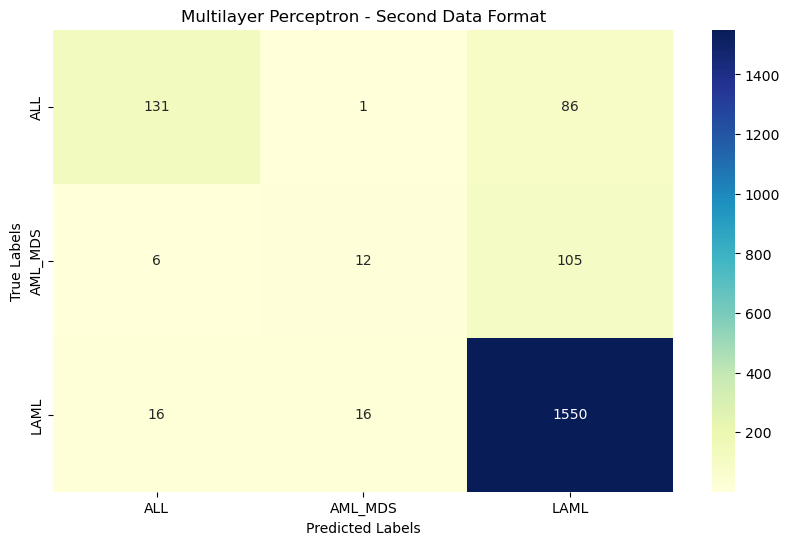

In [71]:
diseases_confu_matrx_1 = confusion_matrix(y_test_2,y_pred)
diseases_confu_matrx_dataframe = pd.DataFrame(diseases_confu_matrx_1,
                                                   index=diseases,
                                                   columns=diseases)


plt.figure(figsize=(10, 6)) 
sns.heatmap(diseases_confu_matrx_dataframe, annot=True, cmap='YlGnBu', fmt='d') 

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Multilayer Perceptron - Second Data Format')


plt.savefig('heatmap_seaborn.png')

plt.show()
